In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

%matplotlib inline

In [2]:
start = '2010-01-01'
end = '2019-12-31'

data = yf.download('MSFT', start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.522568,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.530167,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.385769,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.142559,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.302151,51197400


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,158.119995,158.119995,157.270004,157.410004,151.994125,17718200
2019-12-24,157.479996,157.710007,157.119995,157.380005,151.965164,8989200
2019-12-26,157.559998,158.729996,157.399994,158.669998,153.210739,14520600
2019-12-27,159.449997,159.550003,158.220001,158.960007,153.490814,18412800
2019-12-30,158.990005,159.020004,156.729996,157.589996,152.167908,16348400


In [5]:
data = data.reset_index()

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.522568,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.530167,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.385769,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.142559,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.302151,51197400


In [7]:
data = data.drop(['Date', 'Adj Close'], axis = 1)

In [8]:
data.head()

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400


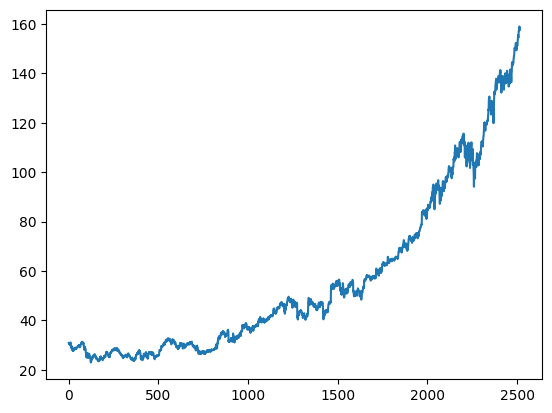

In [9]:
plt.plot(data.Close)

In [10]:
ma100 = data.Close.rolling(100).mean()

In [11]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2510    142.3618
2511    142.5666
2512    142.8312
2513    143.0739
2514    143.2970
Name: Close, Length: 2515, dtype: float64

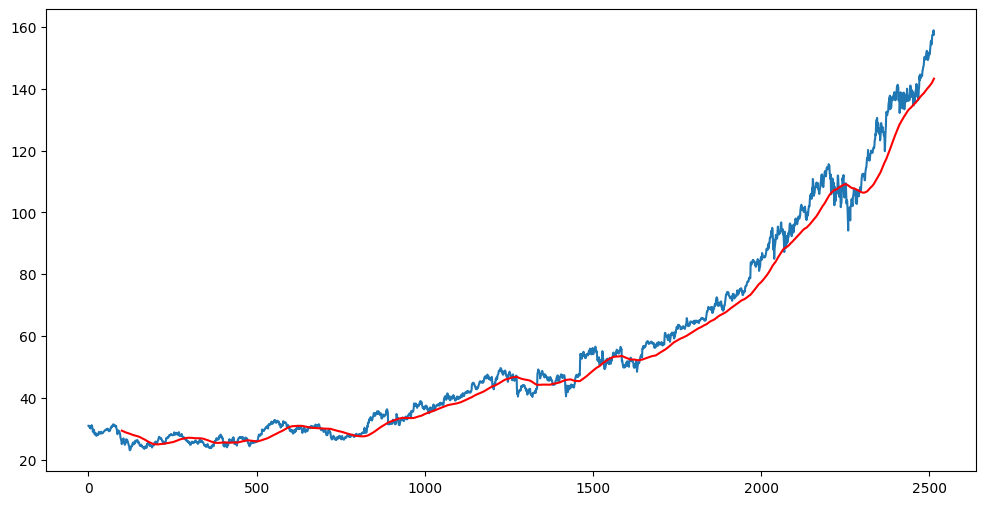

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

In [13]:
ma200 = data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    135.23265
2511    135.45145
2512    135.67230
2513    135.89415
2514    136.10255
Name: Close, Length: 2515, dtype: float64

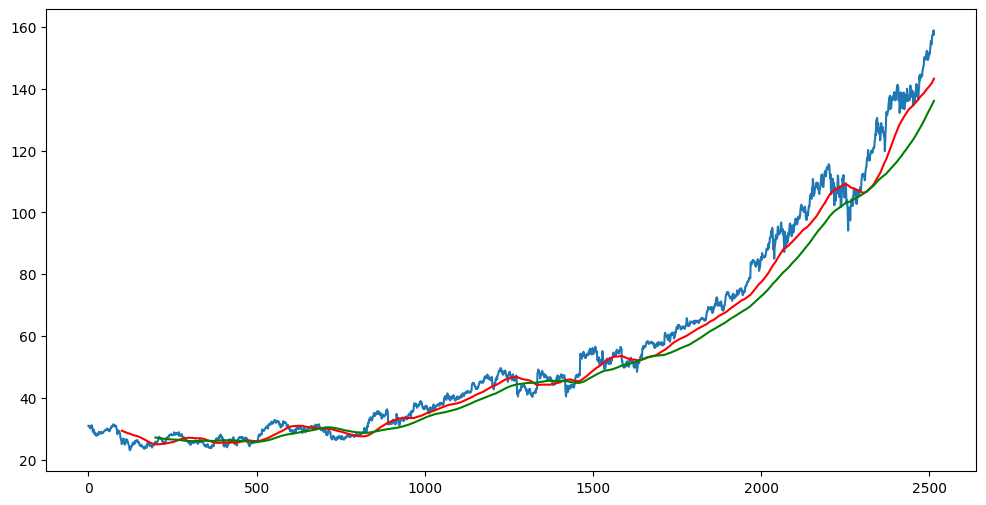

In [14]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
data.shape

(2515, 5)

In [16]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70):])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [17]:
data_training.head()

,Close
0,30.950001
1,30.959999
2,30.770000
3,30.450001
4,30.660000


In [18]:
data_testing.head()

,Close
1760,62.900002
1761,62.139999
1762,62.580002
1763,62.299999
1764,62.299999


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))

In [56]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.19551836],
       [0.19576457],
       [0.19108595],
       ...,
       [0.99064277],
       [0.99162767],
       [0.98448665]])

In [22]:
data_training_array.shape

(1760, 1)

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [24]:
x_train, y_train = np.array(x_train), np.array(y_train)

## ML Model

In [34]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [35]:
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 12s 147ms/step - loss: 0.0496
Epoch 2/50
52/52 [==============================] - 8s 150ms/step - loss: 0.0104
Epoch 3/50
52/52 [==============================] - 8s 148ms/step - loss: 0.0082
Epoch 4/50
52/52 [==============================] - 8s 147ms/step - loss: 0.0074
Epoch 5/50
52/52 [==============================] - 8s 149ms/step - loss: 0.0072
Epoch 6/50
52/52 [==============================] - 8s 150ms/step - loss: 0.0071
Epoch 7/50
52/52 [==============================] - 8s 149ms/step - loss: 0.0064
Epoch 8/50
52/52 [==============================] - 8s 161ms/step - loss: 0.0060
Epoch 9/50
52/52 [==============================] - 9s 168ms/step - loss: 0.0056
Epoch 10/50
52/52 [==============================] - 8s 163ms/step - loss: 0.0053
Epoch 11/50
52/52 [==============================] - 8s 158ms/step - loss: 0.0060
Epoch 12/50
52/52 [==============================] - 8s 157ms/step - loss: 0.0054
Epoch 13/50
52/52 [=====

In [38]:
model.save('keras_model.h5')

C:\Users\ASUS\Desktop\projects\TFOD\TFODCourse\tfod\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
data_testingsting.head()

,Close
1760,62.900002
1761,62.139999
1762,62.580002
1763,62.299999
1764,62.299999


In [40]:
data_training.tail(100)

,Close
1660,58.060001
1661,58.200001
1662,58.020000
1663,58.299999
1664,57.939999
...,...
1755,63.540001
1756,63.549999
1757,63.240002
1758,63.279999


In [41]:
past_100_days = data_training.tail(100)

In [46]:
past_100_days

pandas.core.frame.DataFrame

In [45]:
past_100_days.reset_index().drop('index',axis=1)

,Close
0,58.060001
1,58.200001
2,58.020000
3,58.299999
4,57.939999
...,...
95,63.540001
96,63.549999
97,63.240002
98,63.279999


In [47]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [49]:
final_df.head()

,Close
0,58.060001
1,58.200001
2,58.020000
3,58.299999
4,57.939999


In [60]:
input_data = scaler.fit_transform(final_df)

In [61]:
input_data.shape

(855, 1)

In [62]:
input_data

array([[1.80048871e-02],
       [1.93674115e-02],
       [1.76155838e-02],
       [2.03406326e-02],
       [1.68369773e-02],
       [1.85888049e-02],
       [1.19707976e-02],
       [1.31387074e-02],
       [1.35279736e-02],
       [1.37226252e-02],
       [1.42092358e-02],
       [1.63503667e-02],
       [1.69343216e-02],
       [1.90754155e-02],
       [1.77128911e-02],
       [1.83941533e-02],
       [1.63503667e-02],
       [1.21654492e-02],
       [1.34306663e-02],
       [1.42092358e-02],
       [1.36253180e-02],
       [1.41119285e-02],
       [1.18734903e-02],
       [0.00000000e+00],
       [8.17518336e-03],
       [3.11435203e-03],
       [4.86610544e-04],
       [9.53770773e-03],
       [1.01216627e-02],
       [7.00731063e-03],
       [5.83943790e-03],
       [1.50851496e-02],
       [1.56691045e-02],
       [1.18734903e-02],
       [6.71535173e-03],
       [1.69343216e-02],
       [1.77128911e-02],
       [1.15815314e-02],
       [1.35279736e-02],
       [1.17761459e-02],


In [63]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [65]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 47ms/step


In [66]:
y_predicted.shape

(755, 1)

In [67]:
y_test

array([0.06510951, 0.05771289, 0.06199516, 0.05927007, 0.05927007,
       0.06452555, 0.06257907, 0.06238442, 0.06793186, 0.06228711,
       0.06316303, 0.06150851, 0.06121655, 0.05927007, 0.06355233,
       0.06569343, 0.07114356, 0.07270074, 0.07844279, 0.09313868,
       0.08681263, 0.08214114, 0.07172752, 0.06773721, 0.07270074,
       0.07231143, 0.07026765, 0.06939173, 0.07639901, 0.07581509,
       0.0828224 , 0.08136253, 0.08097323, 0.08087588, 0.08184918,
       0.08058392, 0.07931874, 0.08184918, 0.08184918, 0.07805356,
       0.07562044, 0.08496353, 0.07591243, 0.07824818, 0.07844279,
       0.07970805, 0.0854501 , 0.08291974, 0.08486619, 0.08272505,
       0.07980539, 0.08311436, 0.08204379, 0.08428227, 0.08486619,
       0.07785887, 0.08583941, 0.08428227, 0.08535283, 0.08652067,
       0.08836984, 0.09012167, 0.09245741, 0.09391728, 0.09090028,
       0.0926521 , 0.09099755, 0.0926521 , 0.09216546, 0.09070559,
       0.09021901, 0.08778592, 0.0850608 , 0.09021901, 0.08934

In [68]:
y_predicted

array([[0.12967384],
       [0.1297154 ],
       [0.12913826],
       [0.12803683],
       [0.12654561],
       [0.12484002],
       [0.12317988],
       [0.12174717],
       [0.120648  ],
       [0.11999938],
       [0.11975598],
       [0.1198343 ],
       [0.12010989],
       [0.12046266],
       [0.12077114],
       [0.12101749],
       [0.12124407],
       [0.12157197],
       [0.12210378],
       [0.12295929],
       [0.12439492],
       [0.12642516],
       [0.12885495],
       [0.13126384],
       [0.13320485],
       [0.13443893],
       [0.134881  ],
       [0.13455033],
       [0.1335626 ],
       [0.13222006],
       [0.13081518],
       [0.12968598],
       [0.12903085],
       [0.12890524],
       [0.12925962],
       [0.12999617],
       [0.13096708],
       [0.13200155],
       [0.13299158],
       [0.13386199],
       [0.13450816],
       [0.13482642],
       [0.13491537],
       [0.1347639 ],
       [0.1344119 ],
       [0.13392296],
       [0.13338786],
       [0.132

In [69]:
scaler.scale_

array([0.00973236])

In [70]:
scale_factor = 1/0.00973236
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

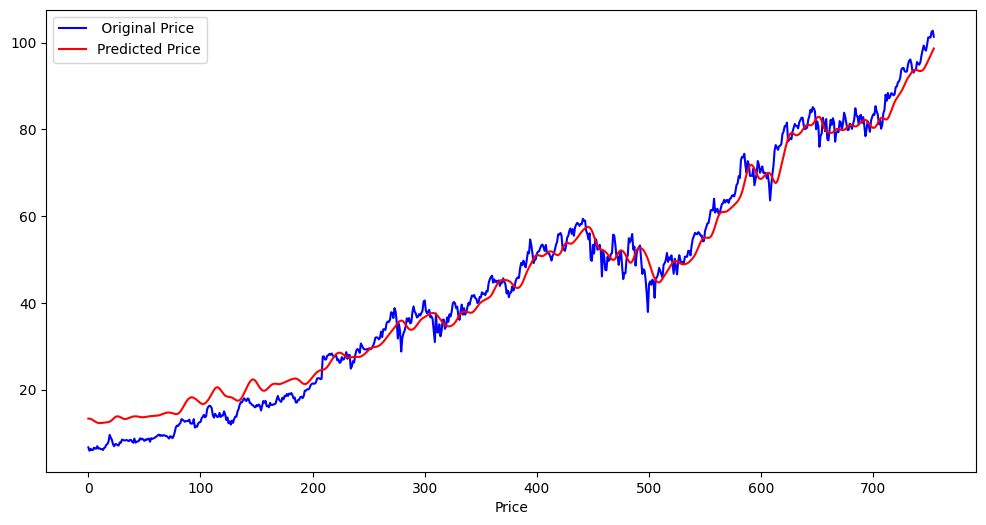

In [71]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = ' Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show()

In [72]:
stock1 = pd.read_csv('stock1.csv')

In [74]:
stock1 = stock1[['Symbol','Name']]

In [75]:
stock2 = pd.read_csv('stock2.csv')

In [78]:
stock2 = stock2[['Symbol','Name']]

In [80]:
stock3 = pd.read_csv('stock3.csv')

In [82]:
stock3 = stock3[['Symbol','Company Name']]

In [87]:
stocks = pd.concat([stock1, stock2], ignore_index=True)

In [93]:
stock3.rename(columns={'Company Name':'Name'}, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23116\2745366363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock3.rename(columns={'Company Name':'Name'}, inplace=True)


In [96]:
stock3['Symbol'] = stock3['Symbol'].apply(lambda x: str(x)+'.NS')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23116\3926141803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock3['Symbol'] = stock3['Symbol'].apply(lambda x: str(x)+'.NS')


In [98]:
stocks = pd.concat([stocks, stock3], ignore_index=True)

In [99]:
stocks

,Symbol,Name
0,AACG,ATA Creativity Global American Depositary Shares
1,AACI,Armada Acquisition Corp. I Common Stock
2,AACIU,Armada Acquisition Corp. I Unit
3,AACIW,Armada Acquisition Corp. I Warrant
4,AADI,Aadi Bioscience Inc. Common Stock
...,...,...
9336,VIVIMEDLAB.NS,Vivimed Labs Limited
9337,WINSOME.NS,Winsome Yarns Limited
9338,ZICOM.NS,Zicom Electronic Security Systems Limited
9339,nan.NS,NaN


In [104]:
stocks.dropna(inplace=True)

In [106]:
stocks.shape

(9338, 2)

In [107]:
stocks.to_csv('List_of_Stocks.csv', index=False)

In [108]:
stock_temp = stocks

In [109]:
stock_temp['Name1'] = stock_temp['Symbol'] + ' - ' + stock_temp['Name']

In [113]:
stock_temp.drop(['Name'], inplace=True, axis = 1)

In [114]:
stock_temp.rename(columns={'Name1':'Name'}, inplace=True)

In [115]:
stocks = pd.concat([stocks, stock_temp], ignore_index=True)

In [116]:
stocks.shape

(18676, 2)

In [117]:
stocks.to_csv('List_of_Stocks.csv', index=False)

In [122]:
value = stocks.loc[stocks['Name'] == 'ATA Creativity Global American Depositary Shares', 'Symbol']

In [123]:
value

Series([], Name: Symbol, dtype: object)

In [124]:
duplicates = stocks[stocks.duplicated()]

In [125]:
duplicates

,Symbol,Name
9338,AACG,AACG - ATA Creativity Global American Deposita...
9339,AACI,AACI - Armada Acquisition Corp. I Common Stock
9340,AACIU,AACIU - Armada Acquisition Corp. I Unit
9341,AACIW,AACIW - Armada Acquisition Corp. I Warrant
9342,AADI,AADI - Aadi Bioscience Inc. Common Stock
...,...,...
18671,VIKASPROP.NS,VIKASPROP.NS - Vikas Proppant & Granite Limited
18672,VISUINTL.NS,VISUINTL.NS - Visu International Limited
18673,VIVIMEDLAB.NS,VIVIMEDLAB.NS - Vivimed Labs Limited
18674,WINSOME.NS,WINSOME.NS - Winsome Yarns Limited
